In [7]:
import numpy as np 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

## data Expoloration 

In [8]:
#method to print directory structure
def explore_dir(path, train_data, test_data, labels):
    print("Directory structure of base directory", base_path)
    n_train = 0
    n_test = 0
    for dr in os.listdir(base_path):
        print("\t",dr)
        if dr == 'seg_pred':
            print("\t\t Number of files", len(os.listdir(base_path + dr + '/' )))
        else:
            for dr2 in os.listdir(base_path + dr + '/'):
                            print('\t\t\t',dr2)
                            print("\t\t\t\t Number of files", len(os.listdir(base_path + dr + '/' + dr2 + "/")))
                            if (dr == 'seg_train'):
                                n_train = n_train + len(os.listdir(base_path + dr + '/' + dr2 + "/"))
                                train_data[dr2] =  len(os.listdir(base_path + dr + '/' + dr2 + "/"))
                                labels.append(dr2)
                            elif(dr == 'seg_test'):
                                n_test = n_test + len(os.listdir(base_path + dr + '/' + dr2 + "/"))
                                test_data[dr2] =  len(os.listdir(base_path + dr + '/' + dr2 + "/"))

In [9]:
#method to show sample images form train set
def sample_plots(path):
    print_dataset = ImageDataGenerator()
    print_gen = print_dataset.flow_from_directory(
               path,  # this is the target directory
                target_size=(img_size, img_size),
                batch_size=30,
                classes = labels)  
    figsize=(12,13)
    rows=5
    interp=False
    ims, titles = next(print_gen)
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            val, = np.where(titles[i]==1)
            sp.set_title(labels[val[0]], fontsize=13)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [10]:
base_path = './storage/GV/dataset/'
train_path = './storage/GV/dataset/seg_train'
img_size = 100
test_data = {} 
train_data = {}
labels = []

#### Lets explore directory structure for the dataset and see how our data is stored

In [5]:
explore_dir(base_path, train_data, test_data, labels)

Directory structure of base directory ./storage/GV/dataset/
	 seg_pred
		 Number of files 7302
	 seg_train
			 glacier
				 Number of files 2404
			 buildings
				 Number of files 2191
			 sea
				 Number of files 2274
			 forest
				 Number of files 2271
			 mountain
				 Number of files 2512
			 street
				 Number of files 2382
	 seg_test
			 glacier
				 Number of files 553
			 buildings
				 Number of files 437
			 sea
				 Number of files 510
			 forest
				 Number of files 474
			 mountain
				 Number of files 525
			 street
				 Number of files 501


#### Print some sample images 

Found 14034 images belonging to 6 classes.


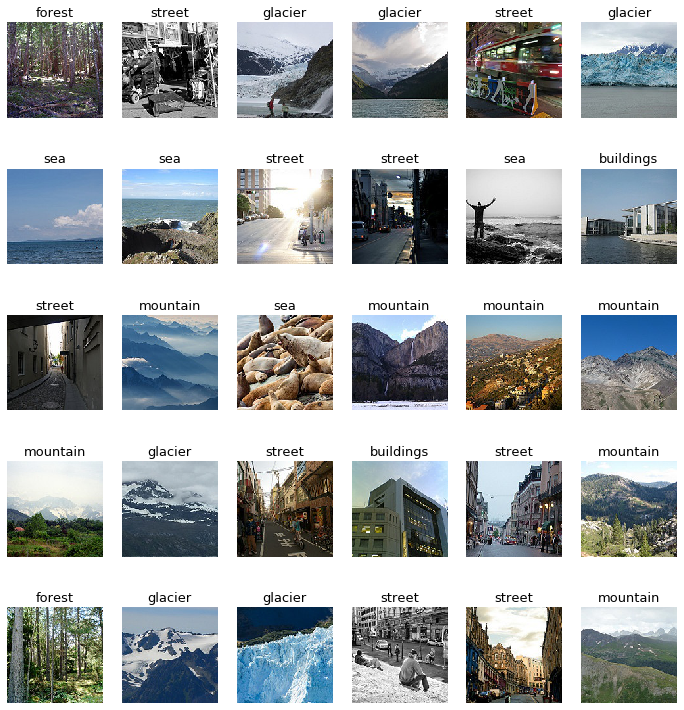

In [6]:
sample_plots(train_path)

#### Lets see the amount of test and train data we have for each class 

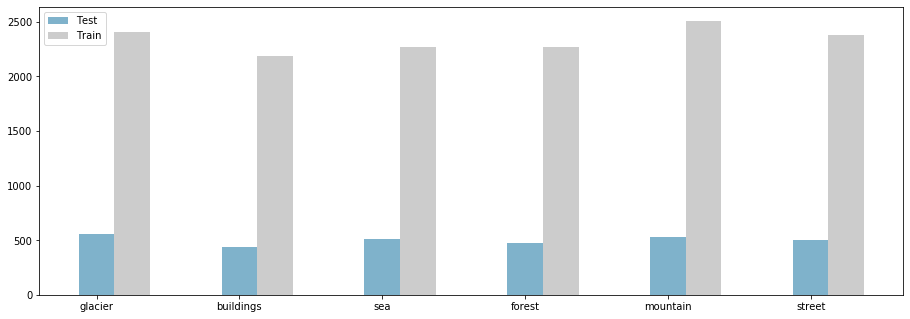

In [115]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
X = np.arange(6)
ax.bar(X, tuple(test_data.values()), color=(0, 0.4, 0.6, 0.5), width=0.25)
ax.bar(X + 0.25, tuple(train_data.values()), color=(0.8, 0.8, 0.8, 1), width=0.25)
ax.set_xticks(X)
ax.set_xticklabels(labels)
#ax.set_xlabel("Classes")
#ax.set_ylabel("# of cases")
ax.legend(labels=['Test', 'Train'])
plt.show()